# Imports

In [1]:
# Essential Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Insert imports for preprocessing

# Insert imports for model selection

# Insert imports for modelling


## Dataset

In [4]:
# Loading the dataset
df_23 = pd.read_csv(
    "dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv"
    )   


C:\Users\Gelo\AppData\Local\Temp\ipykernel_11640\3762061857.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_23 = pd.read_csv(


In [5]:
df_23.head()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,...,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,...,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,...,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,...,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,...,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,...,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1


# EDA

## Preliminary Data Analysis

In [6]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

Column # 75 (TOTDIS) is a mixed column 

In [9]:
# Removing whitespaces from the column values
df_23.columns = df_23.columns.str.strip()

# Converting all string values in TOTDIS column to 0
df_23["TOTDIS"] = df_23["TOTDIS"].replace("           ", 0)

# Making the TOTDIS column float
df_23['TOTDIS'] = df_23['TOTDIS'].astype(float)

# Check the data type of the TOTDIS column
df_23['TOTDIS'].dtype

dtype('float64')

In [8]:
# Returning if there are any missing values
df_23.isnull().sum()

W_REGN        0
W_PROV        0
SEQ_NO        0
RPROV         0
FSIZE         0
             ..
RPCINC        0
PRPCINC       0
PPCINC        0
RPCINC_NIR    0
W_REGN_NIR    0
Length: 90, dtype: int64

In [10]:
df_23.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,...,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,...,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,9.343821,45.666328,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.782479e+05,1.678624e+03,2.422786e+04,...,168.310355,691.456715,1.524383,9.530256e+04,5.193816,5.494518,5.564728,5.483561,5.490482,9.713183
std,4.753706,24.759798,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,2.494863e+05,1.239273e+04,8.593570e+04,...,163.523039,783.888869,0.499407,1.585432e+05,2.900291,2.889129,2.873970,2.873305,2.891100,4.957659
min,1.000000,1.000000,1.000000,100.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.019379,0.915853,1.000000,5.240000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,24.000000,40817.750000,2402.000000,3.000000,0.000000e+00,0.000000e+00,2.808000e+04,0.000000e+00,0.000000e+00,...,70.603244,231.964388,1.000000,4.226207e+04,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000
50%,10.000000,46.000000,81634.500000,4600.000000,4.000000,7.200000e+04,0.000000e+00,1.170000e+05,0.000000e+00,0.000000e+00,...,114.635185,444.956711,2.000000,6.552517e+04,5.000000,5.000000,6.000000,5.000000,5.000000,10.000000
75%,13.000000,70.000000,122451.250000,7000.000000,5.000000,2.022000e+05,4.257250e+04,2.330100e+05,0.000000e+00,2.000000e+03,...,192.454697,817.498617,2.000000,1.094002e+05,8.000000,8.000000,8.000000,8.000000,8.000000,14.000000
max,17.000000,98.000000,163268.000000,9900.000000,23.500000,1.547640e+07,1.700000e+07,3.247640e+07,1.200000e+06,4.500000e+06,...,3539.150635,16137.332520,2.000000,4.123060e+07,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


## Preliminary Visualization

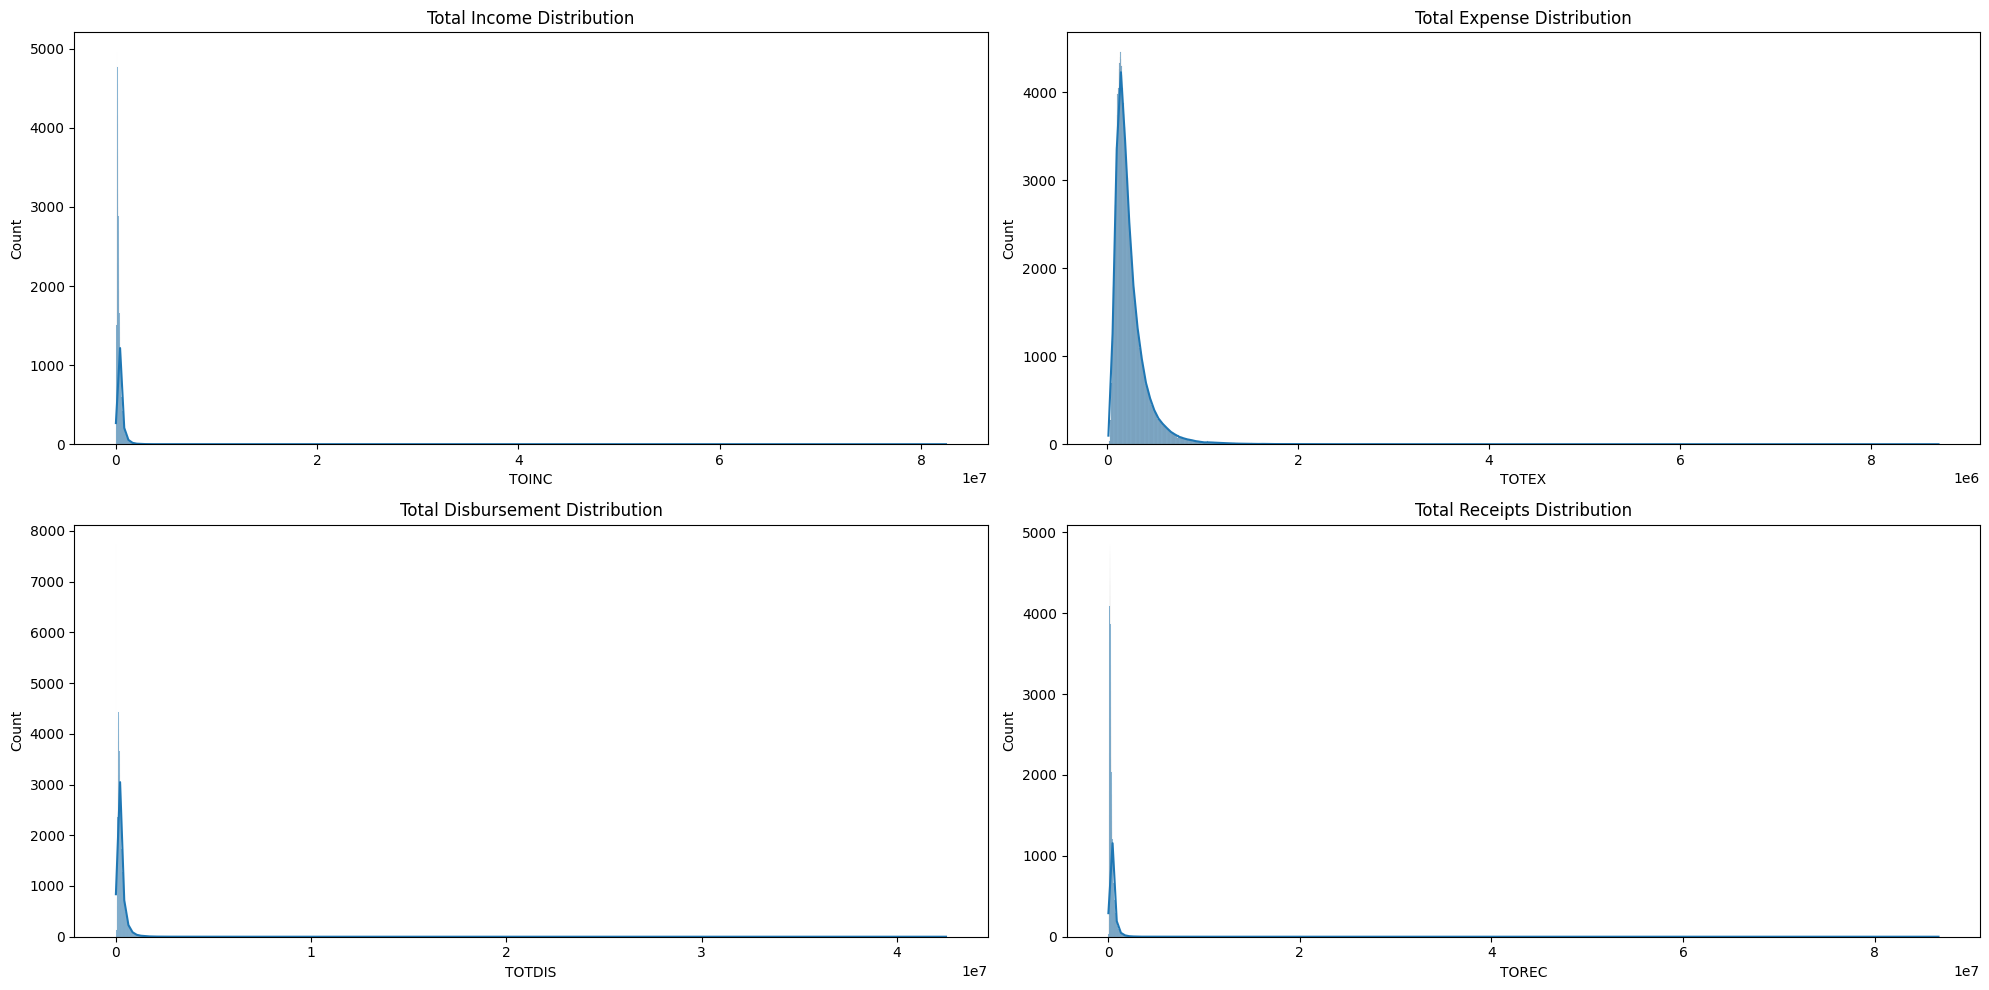

In [28]:
# Creating the subplots
plt.figure(figsize=(20, 10))

# Plotting the distribution of total income, expense, disbursement, and other reciepts
plt.subplot(2, 2, 1)
sns.histplot(df_23["TOINC"], kde=True)
plt.title("Total Income Distribution")

plt.subplot(2, 2, 2)
sns.histplot(df_23["TOTEX"], kde=True)
plt.title("Total Expense Distribution")

plt.subplot(2, 2, 3)
sns.histplot(df_23["TOTDIS"], kde=True)
plt.title("Total Disbursement Distribution")

plt.subplot(2, 2, 4)
sns.histplot(df_23["TOREC"], kde=True)
plt.title("Total Receipts Distribution")

plt.tight_layout()

##### Insights: Totals are very right skewed

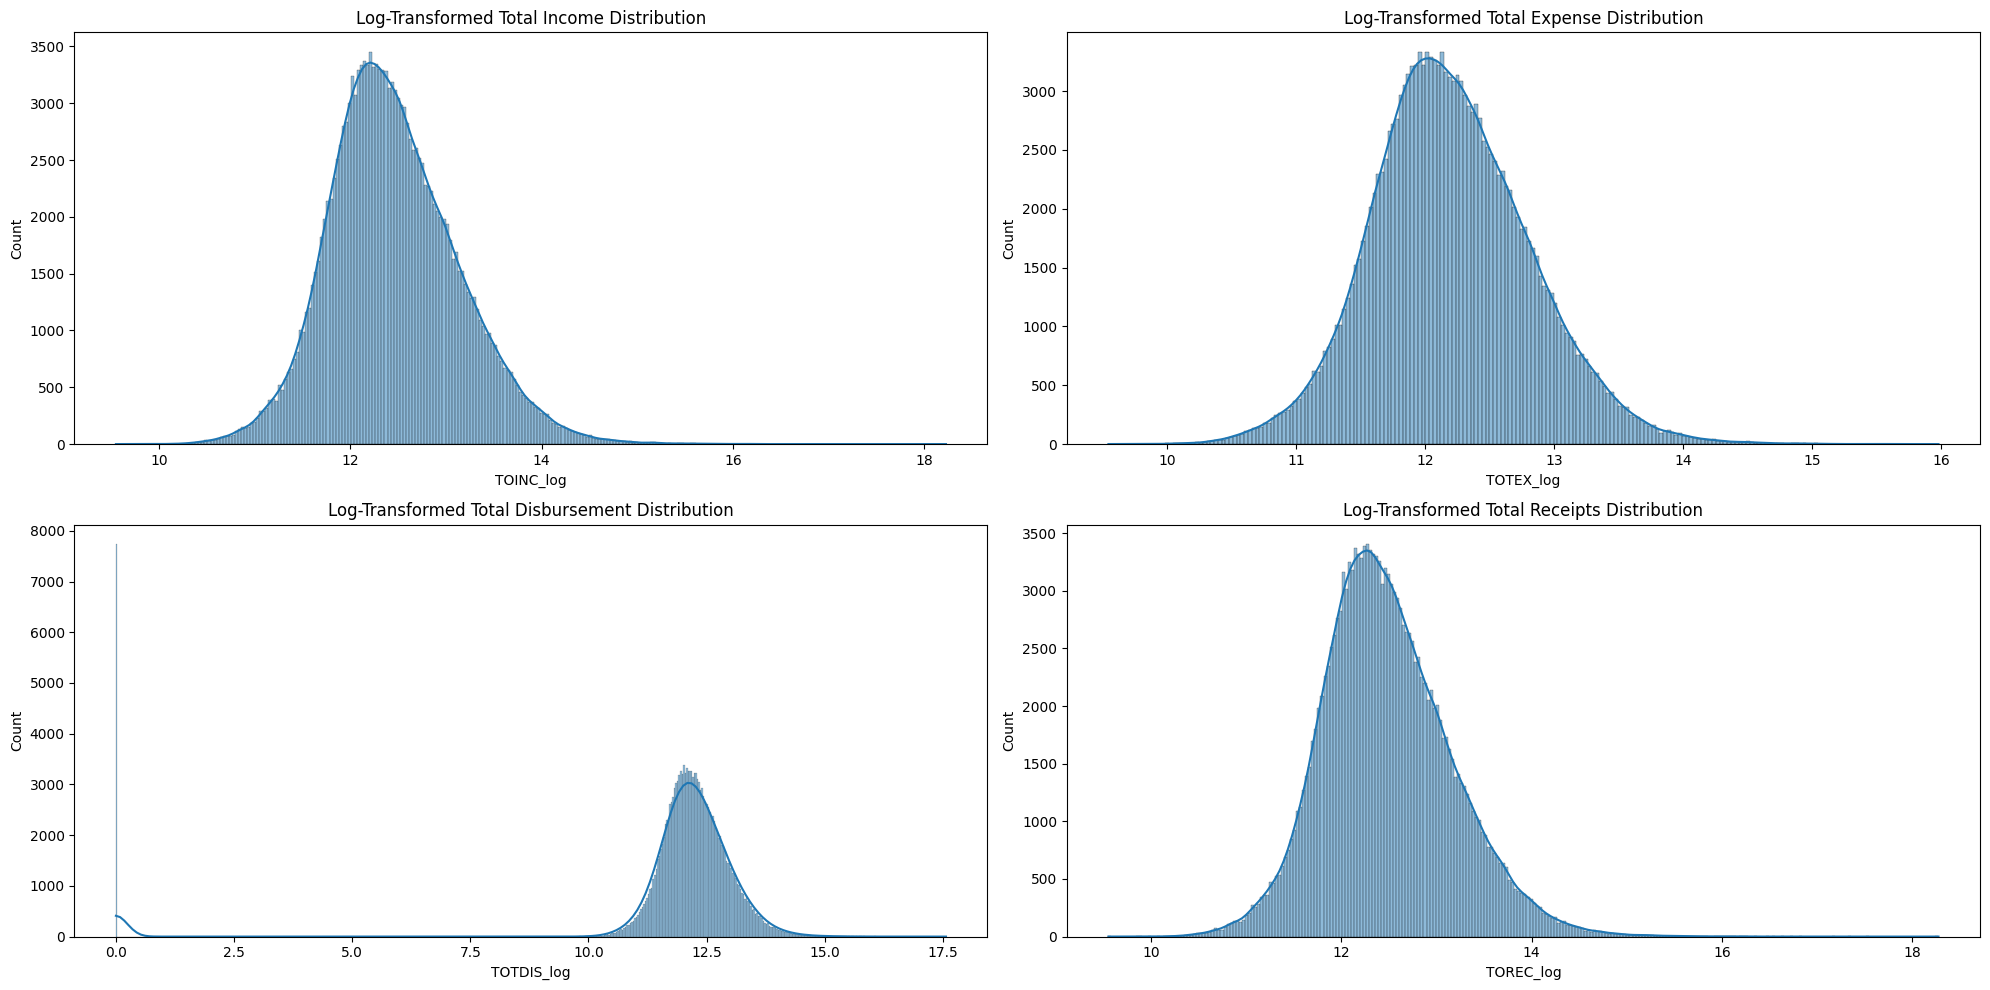

In [32]:
# Apply log transformation to the skewed columns
df_23["TOINC_log"] = np.log1p(df_23["TOINC"])
df_23["TOTEX_log"] = np.log1p(df_23["TOTEX"])
df_23["TOTDIS_log"] = np.log1p(df_23["TOTDIS"])
df_23["TOREC_log"] = np.log1p(df_23["TOREC"])

# Creating the subplots
plt.figure(figsize=(20, 10))

# Plotting the distribution of log-transformed total income, expense, disbursement, and other receipts
plt.subplot(2, 2, 1)
sns.histplot(df_23["TOINC_log"], kde=True)
plt.title("Log-Transformed Total Income Distribution")

plt.subplot(2, 2, 2)
sns.histplot(df_23["TOTEX_log"], kde=True)
plt.title("Log-Transformed Total Expense Distribution")

plt.subplot(2, 2, 3)
sns.histplot(df_23["TOTDIS_log"], kde=True)
plt.title("Log-Transformed Total Disbursement Distribution")

plt.subplot(2, 2, 4)
sns.histplot(df_23["TOREC_log"], kde=True)
plt.title("Log-Transformed Total Receipts Distribution")

plt.tight_layout()
plt.show()

# Preliminary Model